# BUSSINES UNDERSTANDING

# Library Requirement

In [15]:
# Tentukan Library yang dibutuhkan
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
# Load Data set
df = pd.read_csv("positif_dbd1.csv")

In [17]:
df.head()

,wilayah,curah_hujan_mm,kelembaban_rata2,suhu_rata2_c,kepadatan_penduduk,jumlah_banjir,jumlah_kasus_positif_dbd
0,KABUPATEN BANDUNG,1425,72,21,2156,21,3589
1,KABUPATEN BANDUNG BARAT,1588,72,22,1468,8,3754
2,KABUPATEN BEKASI,1551,69,25,2617,11,1902
3,KABUPATEN BOGOR,1585,67,25,1899,29,3404
4,KABUPATEN CIAMIS,1452,67,22,789,11,1420


# Exploratory Data Analisys

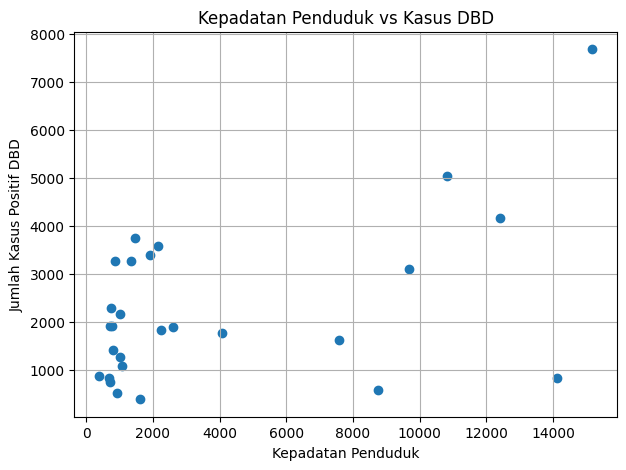

In [18]:
plt.figure(figsize=(7,5))
plt.scatter( x='kepadatan_penduduk',y='jumlah_kasus_positif_dbd',data=df)
plt.title('Kepadatan Penduduk vs Kasus DBD')
plt.xlabel('Kepadatan Penduduk')
plt.ylabel('Jumlah Kasus Positif DBD')
plt.grid(True)
plt.show()

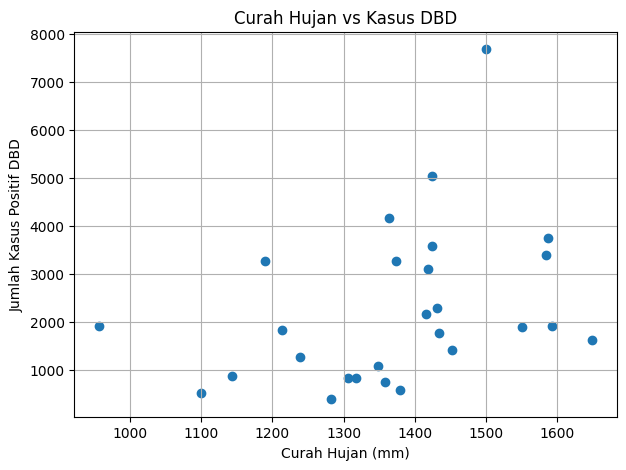

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(x='curah_hujan_mm',y='jumlah_kasus_positif_dbd',data=df)
plt.title('Curah Hujan vs Kasus DBD')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Jumlah Kasus Positif DBD')
plt.grid(True)
plt.show()

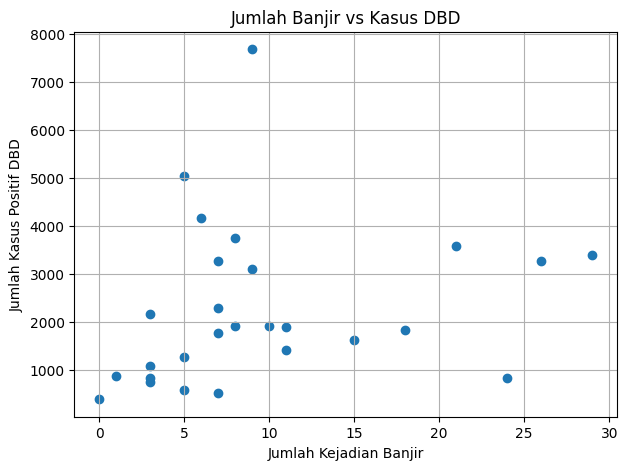

In [20]:
plt.figure(figsize=(7,5))
plt.scatter( x='jumlah_banjir',y='jumlah_kasus_positif_dbd',data=df)
plt.title('Jumlah Banjir vs Kasus DBD')
plt.xlabel('Jumlah Kejadian Banjir')
plt.ylabel('Jumlah Kasus Positif DBD')
plt.grid(True)
plt.show()

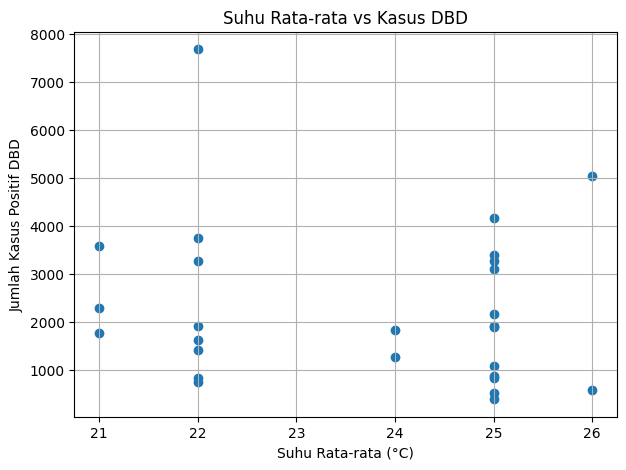

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(
    x='suhu_rata2_c',
    y='jumlah_kasus_positif_dbd',
    data=df
)
plt.title('Suhu Rata-rata vs Kasus DBD')
plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Jumlah Kasus Positif DBD')
plt.grid(True)
plt.show()


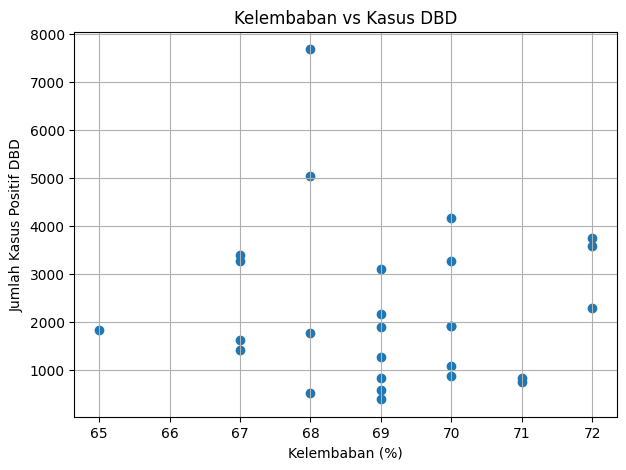

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(
    x='kelembaban_rata2',
    y='jumlah_kasus_positif_dbd',
    data=df
)
plt.title('Kelembaban vs Kasus DBD')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Jumlah Kasus Positif DBD')
plt.grid(True)
plt.show()


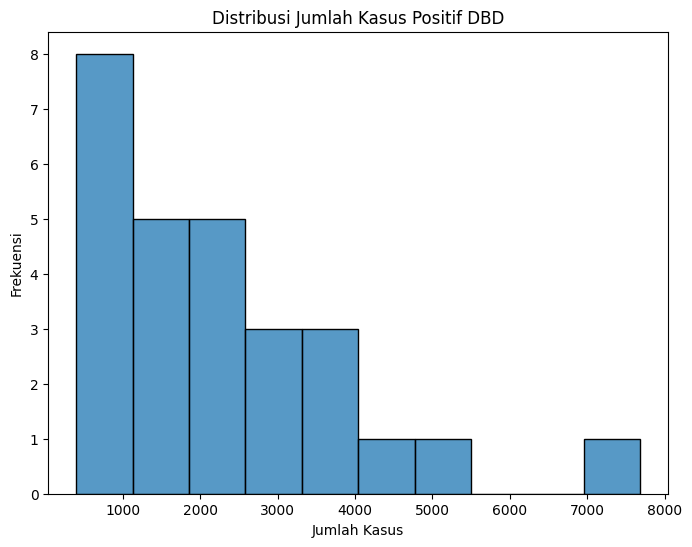

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(x='jumlah_kasus_positif_dbd', data=df, bins=10)
plt.title('Distribusi Jumlah Kasus Positif DBD')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Frekuensi')
plt.show()

In [33]:
fig = px.scatter_3d(df,x='curah_hujan_mm',y='kelembaban_rata2',z='jumlah_banjir',color='jumlah_kasus_positif_dbd',size='jumlah_kasus_positif_dbd',
    title='Curah Hujan, Kelembaban & Banjir terhadap Kasus DBD'
)
fig.show()


# DATA PREPARATION

# Data Information

In [23]:
# berikan informasi dataset seperti jumlah kolom, jumlah baris, tipe data, dll
print("Bentuk Dataset:", df.shape)
print("\nInformasi Tipe Data:")
print(df.info())
print("\nLima baris pertama:")
print(df.head())

Bentuk Dataset: (27, 7)

Informasi Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   wilayah                   27 non-null     object
 1   curah_hujan_mm            27 non-null     int64 
 2   kelembaban_rata2          27 non-null     int64 
 3   suhu_rata2_c              27 non-null     int64 
 4   kepadatan_penduduk        27 non-null     int64 
 5   jumlah_banjir             27 non-null     int64 
 6   jumlah_kasus_positif_dbd  27 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB
None

Lima baris pertama:
                   wilayah  curah_hujan_mm  kelembaban_rata2  suhu_rata2_c  \
0        KABUPATEN BANDUNG            1425                72            21   
1  KABUPATEN BANDUNG BARAT            1588                72            22   
2         KABUPATEN BEKASI            1551              

# Data Transformation

In [24]:
df = pd.read_csv("positif_dbd1.csv")

# Determine Variabel

In [25]:
# tentukan variabel apa saja yang digunakan sebagai fitur/label
print("\n Penentuan fitur dan label")
X = df[["kepadatan_penduduk", "curah_hujan_mm", "jumlah_banjir","kelembaban_rata2","suhu_rata2_c"]]
Y = df["jumlah_kasus_positif_dbd"]

print("Fitur (X):")
print(X.head())
print("\nLabel (Y):")
print(Y.head())


 Penentuan fitur dan label
Fitur (X):
   kepadatan_penduduk  curah_hujan_mm  jumlah_banjir  kelembaban_rata2  \
0                2156            1425             21                72   
1                1468            1588              8                72   
2                2617            1551             11                69   
3                1899            1585             29                67   
4                 789            1452             11                67   

   suhu_rata2_c  
0            21  
1            22  
2            25  
3            25  
4            22  

Label (Y):
0    3589
1    3754
2    1902
3    3404
4    1420
Name: jumlah_kasus_positif_dbd, dtype: int64


# MODELING

# Modeling Classification/ Clustering

In [26]:
# buatkan modeling menggunakan algoritma ML
x = df[['curah_hujan_mm', 'kelembaban_rata2', 'suhu_rata2_c','kepadatan_penduduk','jumlah_banjir']]
y = df['jumlah_kasus_positif_dbd']
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# EVALUATION

# Model Evaluation Classification/Clustering

In [27]:
# untuk supervised bisa menggunakan mse, rmse, atau confusion matrix
# Evaluasi Linier Berganda
y_pred = model.predict(X_test)

#Menghitung MSE dan R2 Score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squarred Error (MSE): {mse}')
print(f'R-Squared (R2) : {r2}')

Mean Squarred Error (MSE): 581913.7206123763
R-Squared (R2) : 0.6034527977901984


# DEPLOYMENT

# Model Simulation

In [28]:
# simulasikan model dengan inputan data baru
intercept = model.intercept_
coefficients = model.coef_
# contoh prediksi
manual = (intercept +(1419 * coefficients[0]) +(69 * coefficients[1]) +(25* coefficients[2])+ (9683 * coefficients[3]) + (9 * coefficients [4]))
input_data = pd.DataFrame(
    [[1419,69,25,9683,9]],
    columns=['curah_hujan_mm', 'kelembaban_rata2', 'suhu_rata2_c','kepadatan_penduduk','jumlah_banjir']
)
prediksi_dbd = model.predict(input_data)
prediksi_dbd

array([3156.93858658])

# SAVE MODEL

In [29]:
# simpan model sebelum dilanjutkan ke aplikasi streamlit
# Menyimpan Model menggunakan pickle
import pickle

filename ='regression_dbd.pkl'
pickle.dump(model,open(filename,'wb'))